In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
 df= pd.read_csv('/content/A_year_of_pizza_sales_from_a_pizza_place_872_68.csv')

In [4]:
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [5]:
df.drop(columns=['Unnamed: 0','X'],axis=1,inplace=True )

In [6]:
df.drop('id',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     49574 non-null  object 
 1   name     49574 non-null  object 
 2   size     49574 non-null  object 
 3   type     49574 non-null  object 
 4   price    49574 non-null  float64
 5   year     49574 non-null  int32  
 6   month    49574 non-null  int32  
 7   day      49574 non-null  int32  
 8   hour     49574 non-null  object 
 9   minutes  49574 non-null  object 
dtypes: float64(1), int32(3), object(6)
memory usage: 3.2+ MB


In [7]:
df.head()

,date,time,name,size,type,price
0,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [17]:
df.isnull().sum()

time       0
name       0
size       0
type       0
price      0
year       0
month      0
day        0
hour       0
minutes    0
dtype: int64

In [9]:
df['date']= pd.to_datetime(df['date'])
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [10]:
df.drop('date',axis=1,inplace=True)

In [11]:
df.head()

,time,name,size,type,price,year,month,day
0,11:38:36,hawaiian,M,classic,13.25,2015,1,1
1,11:57:40,classic_dlx,M,classic,16.00,2015,1,1
2,11:57:40,mexicana,M,veggie,16.00,2015,1,1
3,11:57:40,thai_ckn,L,chicken,20.75,2015,1,1
4,11:57:40,five_cheese,L,veggie,18.50,2015,1,1


In [16]:
df[['hour','minutes']] = df['time'].str.rsplit(':', n=1, expand=True)
df['hour'] = df['hour'].astype(str)
df['hour'] = df['hour'].str.split(':').str.get(0).astype(int)
df['minutes'] = df['minutes'].astype(str)
df['minutes'] = df['minutes'].str.split(':').str.get(1).astype(int)
df.drop('time',axis=1,inplace=True)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [20]:
df.drop('time',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     49574 non-null  object 
 1   size     49574 non-null  object 
 2   type     49574 non-null  object 
 3   price    49574 non-null  float64
 4   year     49574 non-null  int32  
 5   month    49574 non-null  int32  
 6   day      49574 non-null  int32  
 7   hour     49574 non-null  int64  
 8   minutes  49574 non-null  object 
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 2.8+ MB


In [22]:
df.describe()

,price,year,month,day,hour
count,49574.000000,49574.0,49574.000000,49574.000000,49574.000000
mean,16.497762,2015.0,6.452919,15.463328,15.886130
std,3.621954,0.0,3.434638,8.808118,3.150782
min,9.750000,2015.0,1.000000,1.000000,9.000000
25%,12.750000,2015.0,3.000000,8.000000,13.000000
50%,16.500000,2015.0,6.000000,15.000000,16.000000
75%,20.250000,2015.0,9.000000,23.000000,18.000000
max,35.950000,2015.0,12.000000,31.000000,23.000000


In [26]:
df.groupby('size')['price'].mean()

size
L      19.799467
M      15.950256
S      12.363848
XL     25.500000
XXL    35.950000
Name: price, dtype: float64

# Most number of Types orders

In [27]:
df['type'].value_counts()

type
classic    14888
supreme    11987
veggie     11649
chicken    11050
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='Count'>

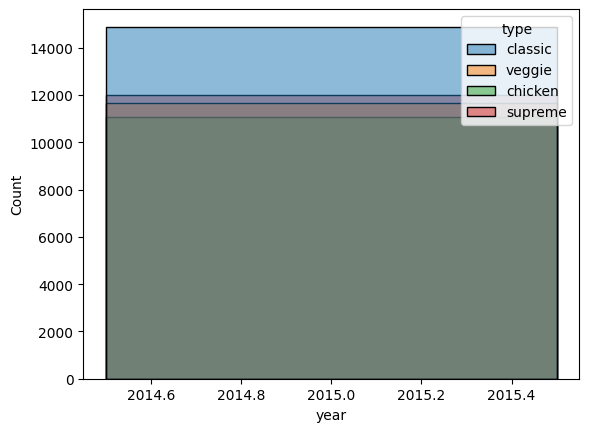

In [31]:
sns.histplot(x='year',data=df,hue='type')

<Axes: xlabel='type', ylabel='year'>

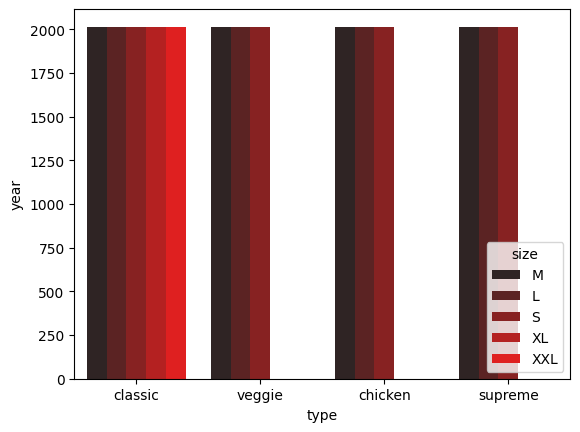

In [32]:
sns.barplot(y='year',x='type',data=df,hue='size',color='red')

In [34]:
df.groupby('day')['size'].count()

day
1     1811
2     1656
3     1701
4     1803
5     1446
6     1709
7     1686
8     1683
9     1690
10    1627
11    1689
12    1469
13    1669
14    1677
15    1873
16    1634
17    1685
18    1628
19    1491
20    1686
21    1588
22    1519
23    1642
24    1576
25    1268
26    1529
27    1790
28    1472
29    1389
30    1473
31    1015
Name: size, dtype: int64

In [35]:
df.groupby(['month'])['size'].count()

month
1     4232
2     3961
3     4261
4     4151
5     4328
6     4107
7     4392
8     4168
9     3890
10    3883
11    4266
12    3935
Name: size, dtype: int64

In [36]:
df[['month','size']].value_counts()

month  size
7      L       1697
5      L       1668
3      L       1651
1      L       1640
11     L       1623
6      L       1590
4      L       1541
8      L       1527
2      L       1521
9      L       1511
12     L       1502
10     L       1485
7      M       1396
4      M       1390
5      M       1338
11     M       1337
6      M       1335
8      M       1331
3      M       1313
1      M       1311
5      S       1265
8      S       1264
11     S       1258
10     M       1253
3      S       1253
7      S       1249
12     M       1233
1      S       1229
2      M       1210
       S       1189
9      M       1188
12     S       1161
9      S       1152
4      S       1151
6      S       1131
10     S       1101
4      XL        65
5      XL        54
7      XL        50
1      XL        50
6      XL        49
11     XL        45
8      XL        44
10     XL        42
3      XL        41
2      XL        38
12     XL        38
9      XL        36
4      XXL        4
3      X

In [37]:
df.groupby('day')['type'].count()

day
1     1811
2     1656
3     1701
4     1803
5     1446
6     1709
7     1686
8     1683
9     1690
10    1627
11    1689
12    1469
13    1669
14    1677
15    1873
16    1634
17    1685
18    1628
19    1491
20    1686
21    1588
22    1519
23    1642
24    1576
25    1268
26    1529
27    1790
28    1472
29    1389
30    1473
31    1015
Name: type, dtype: int64

In [38]:
df.groupby('month')['type'].count()

month
1     4232
2     3961
3     4261
4     4151
5     4328
6     4107
7     4392
8     4168
9     3890
10    3883
11    4266
12    3935
Name: type, dtype: int64

In [39]:
df[['type','month']].value_counts()

type     month
classic  7        1331
         5        1324
         8        1283
         11       1262
         1        1257
         4        1253
         3        1236
         9        1202
         6        1199
         12       1182
         10       1181
         2        1178
veggie   7        1057
supreme  11       1050
         5        1045
         1        1044
         7        1041
         6        1040
veggie   3        1040
         5        1020
         1        1018
supreme  4        1013
         10        998
chicken  3         994
supreme  3         991
         8         991
chicken  11        981
veggie   11        973
supreme  2         964
chicken  7         963
veggie   4         961
         8         960
         6         958
         2         944
chicken  5         939
veggie   12        935
chicken  8         934
supreme  12        933
chicken  4         924
         1         913
veggie   9         911
chicken  6         910
         9         

In [41]:
df.groupby('month')['price'].mean()

month
1     16.491801
2     16.450290
3     16.521263
4     16.559094
5     16.497863
6     16.613148
7     16.520469
8     16.381538
9     16.498728
10    16.489209
11    16.501489
12    16.442478
Name: price, dtype: float64

In [42]:
df.groupby('day')['price'].mean()

day
1     16.349282
2     16.603502
3     16.456878
4     16.459040
5     16.589488
6     16.440872
7     16.391696
8     16.623232
9     16.546686
10    16.575261
11    16.433511
12    16.453268
13    16.575854
14    16.533840
15    16.331500
16    16.456763
17    16.598961
18    16.531757
19    16.603421
20    16.495374
21    16.390869
22    16.461356
23    16.526827
24    16.560025
25    16.463565
26    16.512328
27    16.567570
28    16.409545
29    16.591361
30    16.449830
31    16.482463
Name: price, dtype: float64

In [43]:
df.groupby('hour')['type'].count()

hour
9        4
10      18
11    2728
12    6776
13    6413
14    3613
15    3216
16    4239
17    5211
18    5417
19    4406
20    3534
21    2545
22    1386
23      68
Name: type, dtype: int64

In [44]:
df.groupby('hour')['price'].mean()

hour
9     20.750000
10    16.869444
11    16.472067
12    16.510906
13    16.539170
14    16.385663
15    16.477705
16    16.526398
17    16.549117
18    16.484558
19    16.484090
20    16.472949
21    16.514656
22    16.461147
23    16.490441
Name: price, dtype: float64

In [46]:
df.groupby(['name','hour'])['price'].mean()

name        hour
bbq_ckn     11      17.765385
            12      17.365385
            13      17.525510
            14      17.664286
            15      17.855882
                      ...    
veggie_veg  19      15.205882
            20      15.893162
            21      16.112360
            22      16.966216
            23      16.000000
Name: price, Length: 431, dtype: float64

In [56]:
df[['name','hour','size','type']].value_counts()

name          hour  size  type   
big_meat      12    S     classic    291
              13    S     classic    241
              17    S     classic    221
five_cheese   12    L     veggie     207
big_meat      18    S     classic    206
                                    ... 
soppressata   10    M     supreme      1
hawaiian      9     L     classic      1
green_garden  23    S     veggie       1
the_greek     19    XXL   classic      1
peppr_salami  23    M     supreme      1
Name: count, Length: 1158, dtype: int64

In [60]:
df.groupby('name')['type'].count()

name
bbq_ckn         2432
big_meat        1914
brie_carre       490
calabrese        937
cali_ckn        2370
ckn_alfredo      987
ckn_pesto        973
classic_dlx     2453
five_cheese     1409
four_cheese     1902
green_garden     997
hawaiian        2422
ital_cpcllo     1438
ital_supr       1884
ital_veggie      981
mediterraneo     934
mexicana        1484
napolitana      1464
pep_msh_pep     1359
pepperoni       2418
peppr_salami    1446
prsc_argla      1457
sicilian        1938
soppressata      961
southw_ckn      1917
spicy_ital      1924
spin_pesto       970
spinach_fet     1446
spinach_supr     950
thai_ckn        2371
the_greek       1420
veggie_veg      1526
Name: type, dtype: int64

In [61]:
df.groupby('month')['name'].count()

month
1     4232
2     3961
3     4261
4     4151
5     4328
6     4107
7     4392
8     4168
9     3890
10    3883
11    4266
12    3935
Name: name, dtype: int64

In [63]:
df.groupby('day')['name'].count()

day
1     1811
2     1656
3     1701
4     1803
5     1446
6     1709
7     1686
8     1683
9     1690
10    1627
11    1689
12    1469
13    1669
14    1677
15    1873
16    1634
17    1685
18    1628
19    1491
20    1686
21    1588
22    1519
23    1642
24    1576
25    1268
26    1529
27    1790
28    1472
29    1389
30    1473
31    1015
Name: name, dtype: int64

In [23]:
df.head()

,name,size,type,price,year,month,day,hour,minutes
0,hawaiian,M,classic,13.25,2015,1,1,11,36
1,classic_dlx,M,classic,16.00,2015,1,1,11,40
2,mexicana,M,veggie,16.00,2015,1,1,11,40
3,thai_ckn,L,chicken,20.75,2015,1,1,11,40
4,five_cheese,L,veggie,18.50,2015,1,1,11,40


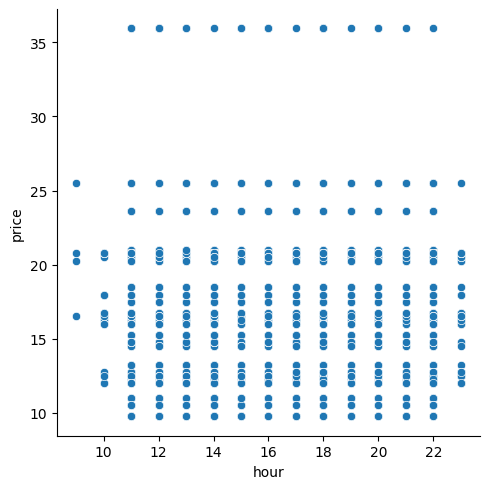

In [65]:
sns.relplot(x='hour',y='price',data=df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, '36'),
  Text(1, 0, '40'),
  Text(2, 0, '28'),
  Text(3, 0, '31'),
  Text(4, 0, '30'),
  Text(5, 0, '37'),
  Text(6, 0, '01'),
  Text(7, 0, '15'),
  Text(8, 0, '59'),
  Text(9, 0, '41'),
  Text(10, 0, '55'),
  Text(11, 0, '19'),
  Text(12, 0, '00'),
  Text(13, 0, '07'),
  Text(14, 0, '08'),
  Text(15, 0, '09'),
  Text(16, 0, '29'),
  Text(17, 0, '26'),
  Text(18, 0, '03'),
  Text(19, 0, '44'),
  Text(20, 0, '17'),
  Text(21, 0, '46'),
  Text(22, 0, '25'),
  Text(23, 0, '18'),
  Text(24, 0, '21'),
  Text(25, 0, '04'),
  Text(26, 0, '23'),
  Text(27, 0, '20'),
  Text(28, 0, '34'),
  Text(29, 0, '48'),
  Text(30, 0, '51'),
  Text(3

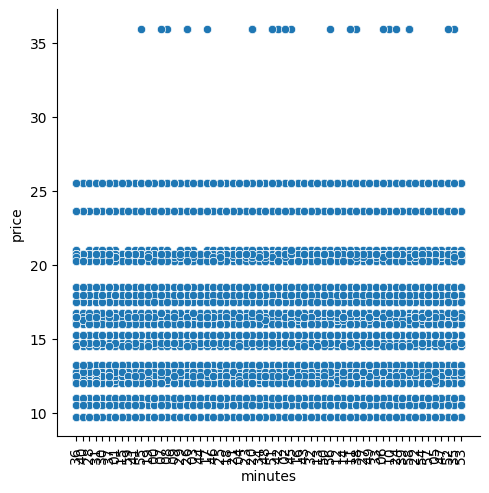

In [67]:
sns.relplot(x='minutes',y='price',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='type', ylabel='price'>

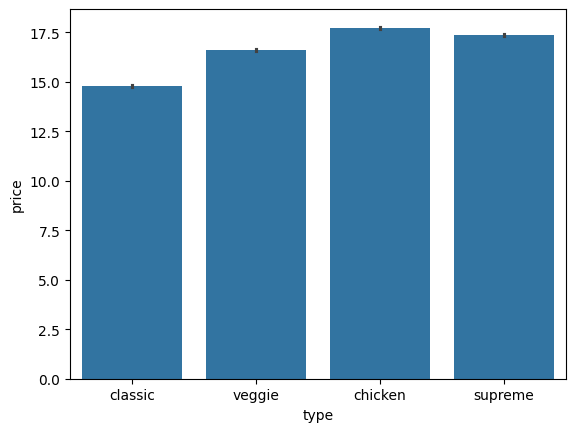

In [68]:
sns.barplot(x='type',y='price',data=df)

<Axes: xlabel='size', ylabel='price'>

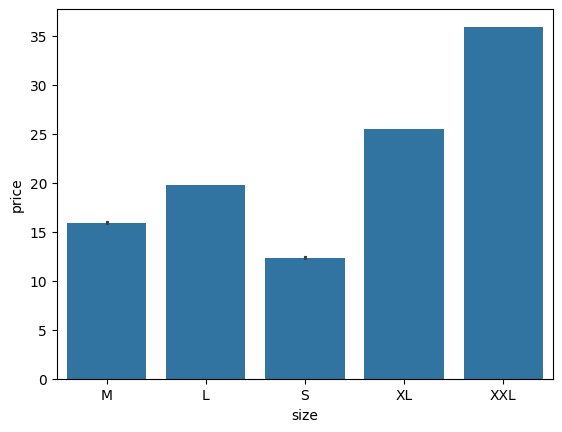

In [69]:
sns.barplot(x='size',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

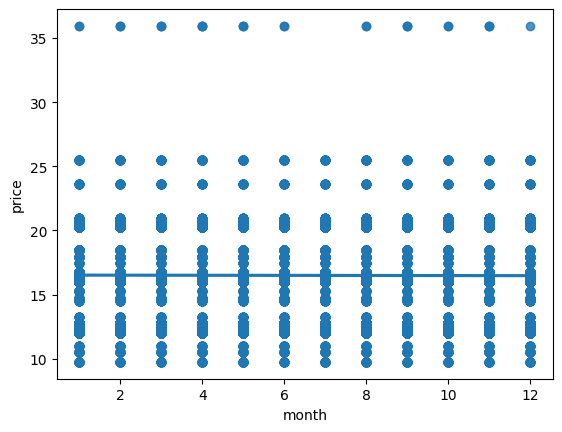

In [70]:
sns.regplot(x='month',y='price',data=df)

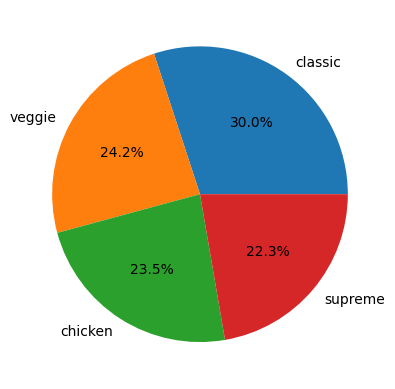

In [72]:
plt.pie(df['type'].value_counts(),labels=df['type'].unique(),autopct='%1.1f%%')
plt.show()

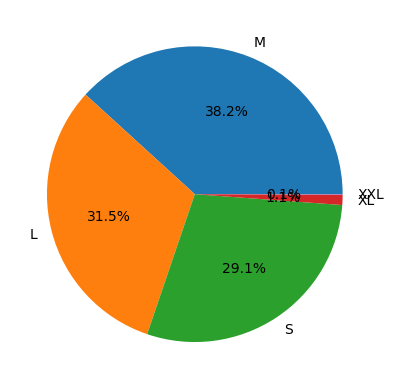

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

In [76]:
plt.pie(df['size'].value_counts(),labels=df['size'].unique(),autopct='%1.1f%%')
plt.show()
plt.figure(figsize=(15,12))

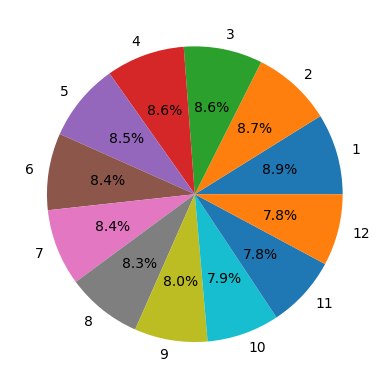

In [77]:
plt.pie(df['month'].value_counts(),labels=df['month'].unique(),autopct='%1.1f%%')
plt.show()

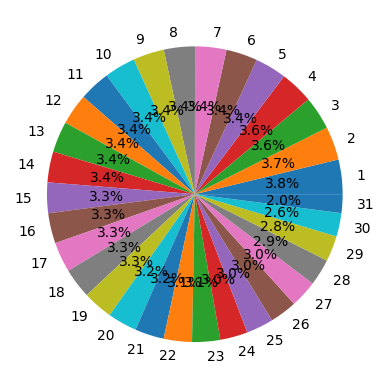

In [78]:
plt.pie(df['day'].value_counts(),labels=df['day'].unique(),autopct='%1.1f%%')
plt.show()

In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['size'] = le.fit_transform(df['size'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     49574 non-null  object 
 1   size     49574 non-null  int64  
 2   type     49574 non-null  int64  
 3   price    49574 non-null  float64
 4   year     49574 non-null  int32  
 5   month    49574 non-null  int32  
 6   day      49574 non-null  int32  
 7   hour     49574 non-null  int64  
 8   minutes  49574 non-null  object 
dtypes: float64(1), int32(3), int64(3), object(2)
memory usage: 2.8+ MB


In [81]:
df['name']=le.fit_transform(df['name'])

In [82]:
df.duplicated().sum()

1024

In [83]:
df.drop_duplicates(keep='first',inplace=True)

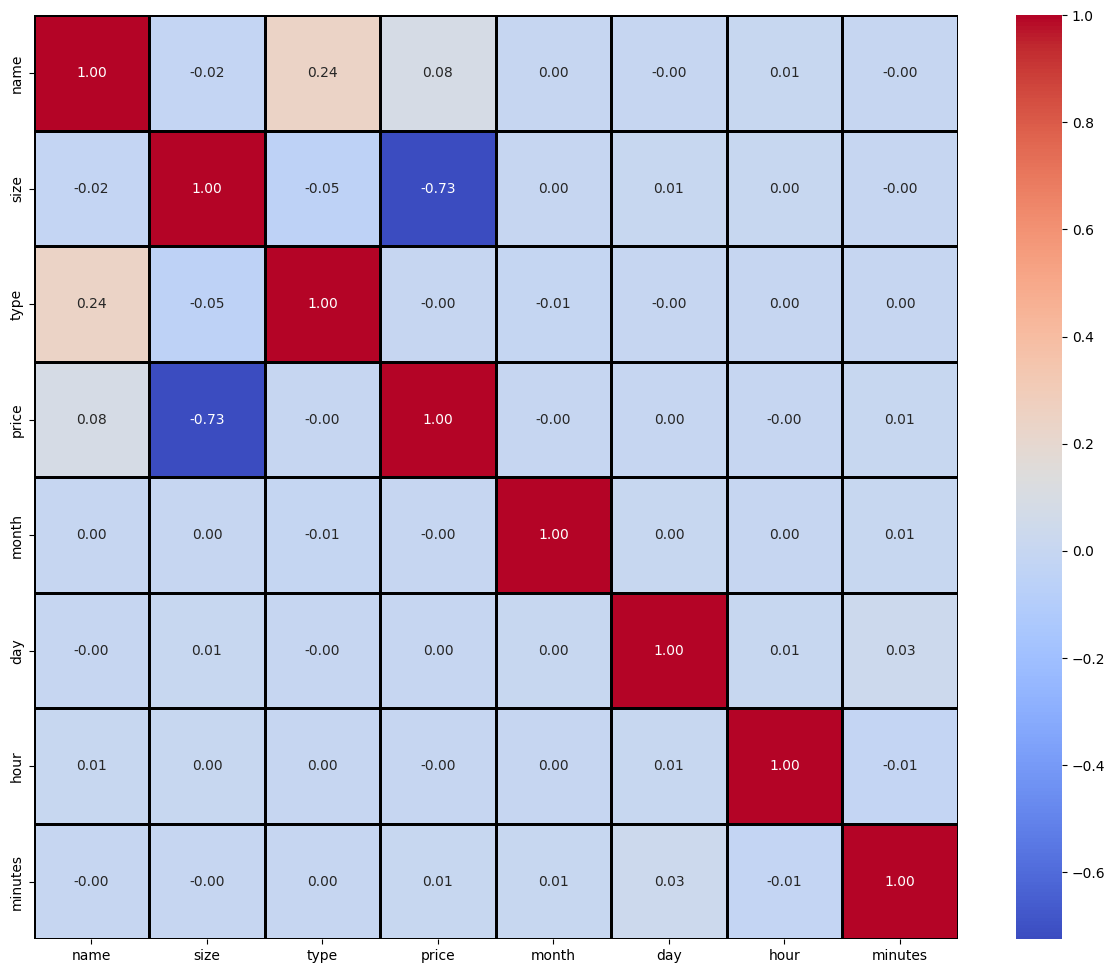

In [88]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f', linewidths=.75,linecolor='black',square=True)
plt.show()

In [87]:
df.drop('year',axis=1,inplace=True)

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [91]:
from sklearn.model_selection import train_test_split
x=df.drop('type',axis=1)
y=df['type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [95]:
cross_val_score(gbc,x_train,y_train,cv=5,n_jobs=-1).mean()

1.0

In [96]:
param_grid={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,4,5,9]
}

In [99]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(gbc,param_grid,cv=3,n_jobs=-1)

In [102]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test,gbc.predict(x_test))

1.0